In [337]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance


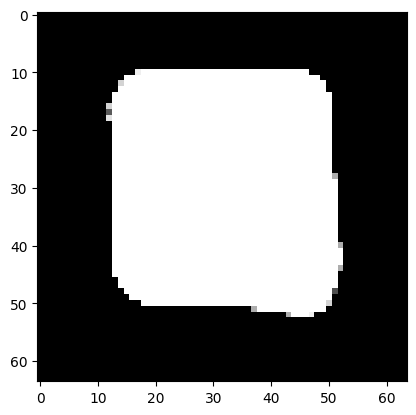

In [338]:
img = cv2.imread("ctverec.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# enhance
img_pil = Image.fromarray(img_gray)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
img = np.array(img_pil)

imshow(img, cmap="gray")


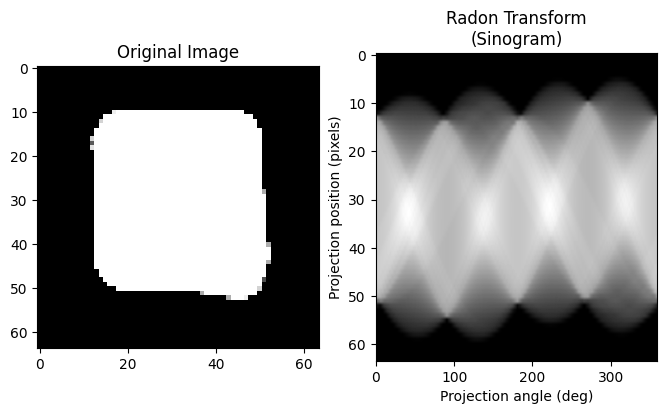

In [339]:
from skimage.transform import radon

# Perform Radon transform
theta = np.linspace(0.0, 360.0, 360, endpoint=False)
sinogram = radon(img, theta=theta, circle=True)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Radon Transform\n(Sinogram)")
plt.xlabel("Projection angle (deg)")
plt.ylabel("Projection position (pixels)")
plt.imshow(sinogram, cmap="gray", aspect="auto")
plt.show()


In [340]:
def get_pos_angle(sinogram):
    pos, angle = np.unravel_index(np.argmax(sinogram, axis=None), sinogram.shape)

    return pos, angle


In [341]:
def get_start_point(pos, angle):
    angle = angle - 90
    vector = np.array([np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))])
    unit_vector = vector / np.linalg.norm(vector)
    unit_vector

    normal_vector = np.array([-unit_vector[1], unit_vector[0]])
    normal_vector

    start_point = np.array([32, 32])
    start_point = start_point + normal_vector * pos
    start_point

    return start_point, normal_vector


29 225


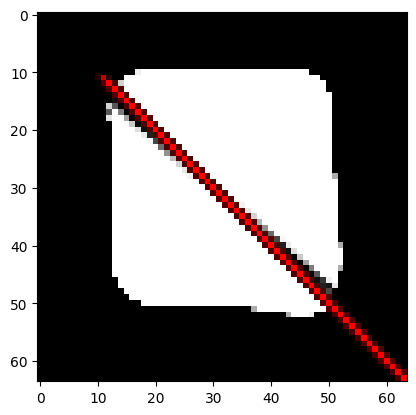

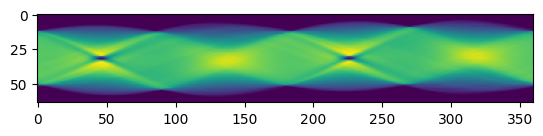

In [356]:
pos, angle = get_pos_angle(sinogram)
print(pos, angle)

start_point, normal_vector = get_start_point(pos, angle)


# Define the start and end points
start_point = (int(start_point[0]), int(start_point[1]))
end_point = (
    int(start_point[0] - normal_vector[0] * 100),
    int(start_point[1] - normal_vector[1] * 100),
)

# Draw the line on the image
# Convert the grayscale image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Draw the line on the RGB image
img_with_line = cv2.line(
    img_rgb.copy(), start_point, end_point, (255, 0, 0), 1, lineType=cv2.LINE_AA
)

img = cv2.line(img.copy(), start_point, end_point, 0, 1, lineType=cv2.LINE_AA)

# Display the image with the line
imshow(img_with_line, cmap="gray")
plt.show()

imshow(sinogram)
sinogram = radon(img, theta=theta, circle=True)
